## Background and Introduction to the Business Problem
Brooklyn has a highest population of all the New York boroughs, it was estimated to be 2,648,771 in 2017. It is also the second by land area, which was estimated as 70.82 sq. miles in 2017 and second in population density, which was estimated as 37,137 persons per sq. mi. in 2017 [Wikipedia]. Overall Brooklyn is mostly residential, which could be a great place to open up a business that would cater to local people, such as convenience store. Brooklyn has 80 neighborhoods. In this project, we will analyze all the neighborhoods in Brooklyn and try to find best locations where one can start a business by opening a convenience store that’ll be in demand. At the same time, we will try to analyze the prices of commercial real estate, to get the most for the buck and see if it’s going to be easier to lease or to purchase premises.
Having a high population density, Brooklyn can be a great place to open up a convenience store. Few things to note though is that because of location and extreme competition real estate prices, be it for rent or for purchase, can get very high. Brooklyn is a very diverse borough, many Brooklyn neighborhoods are ethnic enclaves, based on which, one can adjust to specific needs and interests of surrounding area as well as their own preferences. Therefore, a potential business owner should pick a right niche, either to cater to taste preferences of a specific nationality or to be more general and sell products that are more common to everyone.
To consider all of the aforementioned issues, we will generate a map of Brooklyn, which we will populate with different venues from Foursquare, then cluster it into different districts to look at the interests, prices, competition and other factors of different districts to determine best places to open a convenience store.
This project may be useful to potential entrepreneurs, who are thinking of taking a challenge of opening a business, such as convenience store at such a place as Brooklyn, New York. It also will benefit those, who are interested in exploring more about Brooklyn districts and type of venues it has to offer, including the potential to own or rent a property there.

## Data Description
 •	The data that was used came from the New York .json Dataset, which was downloaded from Coursera website. 
 •	The *.json file contains all of the coordinates for boroughs and districts of New York, from which we remove all the unnecessary coordinates except the ones for Brooklyn that further was used for choropleth map creation. 
 •	The venues were taken from Foursquare API. The data represents coordinates and descriptions of most common venues that belong to all the neighborhoods in Brooklyn. 
 •	We will look at residential and commercial property prices pulling data from Zillow and other retail web pages. Then that data will be clustered into each separate district, and the mean with the median prices for each district will be calculated.
 •	The features that are going to be extracted from the data consist of:
    o	Districts in Brooklyn and real estate prices
    o	Type and frequency of venues

Further, the data will be used to find out which districts have the most potential for opening convenience store, or what kind of convenience stores can be opened there.


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [39]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [40]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [41]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [42]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [43]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [45]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [46]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [47]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [49]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [51]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [52]:
# create map of Manhattan using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

In [53]:
CLIENT_ID = '4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV' # your Foursquare ID
CLIENT_SECRET = 'J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV
CLIENT_SECRET:J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF


In [54]:
brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

In [55]:
neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


In [56]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius



url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=4QBFG31TNS0FHUKOVQ2AXJKL4WLVTZKXS2YCNMB3EQPZ3JQV&client_secret=J21MA5GR10SHWXY2DNSUUGXD4VFPIAJIS3FB4EBTHLYQSOAF&v=20180605&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

In [57]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d8e18b3787dba002b004570'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

In [58]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pilo Arts Day Spa and Salon,Spa,40.624748,-74.030591
1,Bagel Boy,Bagel Shop,40.627896,-74.029335
2,Cocoa Grinder,Juice Bar,40.623967,-74.030863
3,Pegasus Cafe,Breakfast Spot,40.623168,-74.031186
4,Ho' Brah Taco Joint,Taco Place,40.622960,-74.031371


In [60]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

85 venues were returned by Foursquare.


In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [62]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )


Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [63]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2832, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [64]:
brooklyn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,52,52,52,52,52,52
Bay Ridge,85,85,85,85,85,85
Bedford Stuyvesant,25,25,25,25,25,25
Bensonhurst,35,35,35,35,35,35
Bergen Beach,7,7,7,7,7,7
Boerum Hill,87,87,87,87,87,87
Borough Park,28,28,28,28,28,28
Brighton Beach,44,44,44,44,44,44
Broadway Junction,16,16,16,16,16,16


In [65]:
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 294 uniques categories.


In [66]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Rest

In [67]:
brooklyn_onehot.shape

(2832, 294)

In [68]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Rest

In [69]:
brooklyn_grouped.shape

(70, 294)

In [70]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                venue  freq
0            Pharmacy  0.06
1  Chinese Restaurant  0.06
2         Pizza Place  0.06
3       Women's Store  0.04
4     Bubble Tea Shop  0.04


----Bay Ridge----
                 venue  freq
0                  Spa  0.07
1   Italian Restaurant  0.07
2          Pizza Place  0.05
3                  Bar  0.04
4  American Restaurant  0.04


----Bedford Stuyvesant----
                 venue  freq
0                 Café  0.08
1          Pizza Place  0.08
2          Coffee Shop  0.08
3                  Bar  0.08
4  Japanese Restaurant  0.04


----Bensonhurst----
                venue  freq
0         Pizza Place  0.09
1  Chinese Restaurant  0.09
2          Donut Shop  0.06
3       Grocery Store  0.06
4      Ice Cream Shop  0.06


----Bergen Beach----
             venue  freq
0  Harbor / Marina  0.29
1             Park  0.14
2       Playground  0.14
3   Baseball Field  0.14
4       Donut Shop  0.14


----Boerum Hill----
                    venue  freq

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Pharmacy,Pizza Place,Chinese Restaurant,Women's Store,Italian Restaurant,Donut Shop,Cantonese Restaurant,Fast Food Restaurant,Sushi Restaurant,Kids Store
1,Bay Ridge,Spa,Italian Restaurant,Pizza Place,Chinese Restaurant,American Restaurant,Greek Restaurant,Bar,Thai Restaurant,Ice Cream Shop,Sushi Restaurant
2,Bedford Stuyvesant,Coffee Shop,Café,Pizza Place,Bar,BBQ Joint,Deli / Bodega,Sandwich Place,Boutique,New American Restaurant,Gourmet Shop
3,Bensonhurst,Chinese Restaurant,Pizza Place,Ice Cream Shop,Grocery Store,Donut Shop,Sushi Restaurant,Butcher,Liquor Store,Spa,Bridal Shop
4,Bergen Beach,Harbor / Marina,Baseball Field,Donut Shop,Playground,Park,Athletics & Sports,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
5,Boerum Hill,Dance Studio,Coffee Shop,Furniture / Home Store,French Restaurant,Sandwich Place,Spa,Bar,Yoga Studio,Bakery,Gym / Fitness Center
6,Borough Park,Deli / Bodega,Bank,Fast Food Restaurant,Pizza Place,Pharmacy,Coffee Shop,Moving Target,Metro Station,Men's Store,Café
7,Brighton Beach,Russian Restaurant,Beach,Eastern European Restaurant,Restaurant,Sushi Restaurant,Bank,Mobile Phone Shop,Fast Food Restaurant,Gourmet Shop,Supplement Shop
8,Broadway Junction,Diner,Donut Shop,Ice Cream Shop,Gas Station,Pizza Place,Dessert Shop,Recording Studio,Sandwich Place,Caribbean Restaurant,Bus Stop
9,Brooklyn Heights,Yoga Studio,Park,Deli / Bodega,Cosmetics Shop,Gym,Italian Restaurant,Bakery,Pizza Place,Gym / Fitness Center,Grocery Store


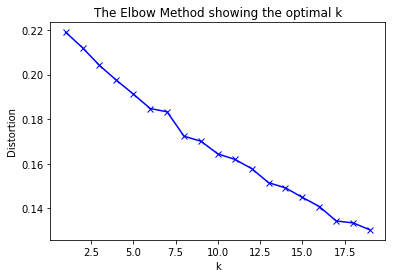

In [74]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(brooklyn_grouped_clustering)
    kmeanModel.fit(brooklyn_grouped_clustering)
    distortions.append(sum(np.min(cdist(brooklyn_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / brooklyn_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [75]:
# set number of clusters
kclusters = 9

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([8, 1, 1, 8, 2, 1, 8, 1, 8, 1], dtype=int32)

In [76]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,1,Spa,Italian Restaurant,Pizza Place,Chinese Restaurant,American Restaurant,Greek Restaurant,Bar,Thai Restaurant,Ice Cream Shop,Sushi Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,8,Chinese Restaurant,Pizza Place,Ice Cream Shop,Grocery Store,Donut Shop,Sushi Restaurant,Butcher,Liquor Store,Spa,Bridal Shop
2,Brooklyn,Sunset Park,40.645103,-74.010316,0,Bank,Pizza Place,Bakery,Latin American Restaurant,Mexican Restaurant,Gym,Mobile Phone Shop,Pharmacy,Stadium,Breakfast Spot
3,Brooklyn,Greenpoint,40.730201,-73.954241,1,Bar,Cocktail Bar,Pizza Place,Coffee Shop,Boutique,French Restaurant,Yoga Studio,Record Shop,Café,Mexican Restaurant
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Italian Restaurant,Pizza Place,Bus Station,Bakery,Lounge,Chinese Restaurant,Gourmet Shop,Liquor Store,Metro Station,Cupcake Shop


In [77]:
brooklyn_merged=brooklyn_merged.drop(51)

In [78]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
brooklyn_merged['Cluster Labels'] = brooklyn_merged['Cluster Labels'].astype(int)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [128]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Vinegar Hill,Wine Shop,Whisky Bar,Bakery,Men's Store,Spa,Scenic Lookout


In [130]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Dyker Heights,Burger Joint,Playground,Discount Store,Farmers Market,Food Truck,Food Stand


In [131]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Pizza Place,Ice Cream Shop,American Restaurant,Grocery Store,Hookah Bar,Sushi Restaurant
3,Greenpoint,French Restaurant,Mexican Restaurant,Record Shop,Café,Boutique,Yoga Studio
6,Sheepshead Bay,Pizza Place,Russian Restaurant,Restaurant,Creperie,Department Store,Yoga Studio
12,Windsor Terrace,Thrift / Vintage Store,Moving Target,Salad Place,Chinese Restaurant,Bookstore,Sushi Restaurant
13,Prospect Heights,Gourmet Shop,Thai Restaurant,Bakery,Cocktail Bar,Café,Diner
15,Williamsburg,Diner,Taco Place,Latin American Restaurant,Steakhouse,Liquor Store,Lounge
16,Bushwick,Pizza Place,Bakery,Thrift / Vintage Store,Discount Store,Vegetarian / Vegan Restaurant,Italian Restaurant
17,Bedford Stuyvesant,Bar,Fried Chicken Joint,BBQ Joint,Cocktail Bar,Gourmet Shop,Boutique
18,Brooklyn Heights,Gym,Italian Restaurant,Bakery,Pizza Place,Gym / Fitness Center,Grocery Store
19,Cobble Hill,Coffee Shop,Ice Cream Shop,Deli / Bodega,Cocktail Bar,Yoga Studio,Flower Shop


In [132]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] ==3, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bensonhurst,Pizza Place,Donut Shop,Ice Cream Shop,Pharmacy,Liquor Store,Cha Chaan Teng
2,Sunset Park,Bank,Pharmacy,Mobile Phone Shop,Gym,Deli / Bodega,Creperie
4,Gravesend,Lounge,Bus Station,Bar,Music Venue,Martial Arts Dojo,Laundromat
7,Manhattan Terrace,Bank,Japanese Restaurant,Jazz Club,Grocery Store,Mobile Phone Shop,Nightclub
9,Crown Heights,Candy Store,Bookstore,Coffee Shop,Grocery Store,Supermarket,Bakery
11,Kensington,Sandwich Place,Ice Cream Shop,Donut Shop,Coffee Shop,Restaurant,Furniture / Home Store
26,East New York,Music Venue,Caribbean Restaurant,Fast Food Restaurant,Salon / Barbershop,Gym,Event Service
28,Canarsie,Asian Restaurant,Thai Restaurant,Gym,Flea Market,Flower Shop,Fish Market
31,Manhattan Beach,Beach,Sandwich Place,Playground,Pizza Place,Discount Store,Farm
34,Borough Park,Pharmacy,Bike Shop,Coffee Shop,Restaurant,Metro Station,Men's Store


In [133]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Paerdegat Basin,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [134]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 5, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Mill Island,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market


In [135]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 6, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Sea Gate,Construction & Landscaping,Beach,Food & Drink Shop,Food,Food Court,Flower Shop


In [136]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 7, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Bergen Beach,Athletics & Sports,Fish Market,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant


In [137]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 8, brooklyn_merged.columns[[1] + list(range(9, brooklyn_merged.shape[1]))]]

,Neighborhood,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Brighton Beach,Mobile Phone Shop,Bank,Sushi Restaurant,Gourmet Shop,Fast Food Restaurant,Bookstore
8,Flatbush,Deli / Bodega,Bagel Shop,Pizza Place,Pharmacy,Donut Shop,Sandwich Place
10,East Flatbush,Food,Chinese Restaurant,Supermarket,Pharmacy,Caribbean Restaurant,Fast Food Restaurant
14,Brownsville,Convenience Store,Performing Arts Venue,Park,Chinese Restaurant,Caribbean Restaurant,Moving Target
25,Cypress Hills,Fast Food Restaurant,Bank,Discount Store,Coffee Shop,Chinese Restaurant,Food
27,Starrett City,American Restaurant,Bus Station,Bus Stop,Pharmacy,Convenience Store,Donut Shop
29,Flatlands,Lounge,Check Cashing Service,Bar,Electronics Store,Paper / Office Supplies Store,Park
32,Coney Island,Brewery,Music Venue,Gourmet Shop,Beach,Food Court,Theme Park Ride / Attraction
33,Bath Beach,Bubble Tea Shop,Fast Food Restaurant,Kids Store,Pizza Place,Coffee Shop,Sushi Restaurant
44,City Line,Pizza Place,Fried Chicken Joint,Pet Store,Lingerie Store,Supermarket,Liquor Store
